In [ ]:
# 📘 Fake News Detection EDA Notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import string

# Display all columns
pd.set_option('display.max_columns', None)

# Load dataset
df = pd.read_csv('fake_news.csv')

# Preview data
df.head()


,title,text,label
0,Donald Trump Sends Out Embarrassing New Year's...,President Donald Trump just couldn't help hims...,1
1,NASA Confirms Earth Will Go Dark for Six Days,NASA has confirmed that Earth will experience ...,1
2,The moon is made of cheese says scientist,"In a shocking turn of events, a well-known sci...",1
3,COVID-19 vaccine is effective and safe,"After multiple trials, the COVID-19 vaccine sh...",0
4,Scientists discover water on Mars,NASA's rover has confirmed the presence of wat...,0


In [2]:
# 📊 Basic Info

print("Shape of the dataset:", df.shape)
df.info()
df.describe(include='all')


Shape of the dataset: (7, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   7 non-null      object
 1   text    7 non-null      object
 2   label   7 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 300.0+ bytes


,title,text,label
count,7,7,7.000000
unique,7,7,NaN
top,Donald Trump Sends Out Embarrassing New Year's...,President Donald Trump just couldn't help hims...,NaN
freq,1,1,NaN
mean,NaN,NaN,0.571429
std,NaN,NaN,0.534522
min,NaN,NaN,0.000000
25%,NaN,NaN,0.000000
50%,NaN,NaN,1.000000
75%,NaN,NaN,1.000000


In [3]:
# 🔍 Check for missing values

df.isnull().sum()

# Drop rows with missing values (optional)
df.dropna(inplace=True)


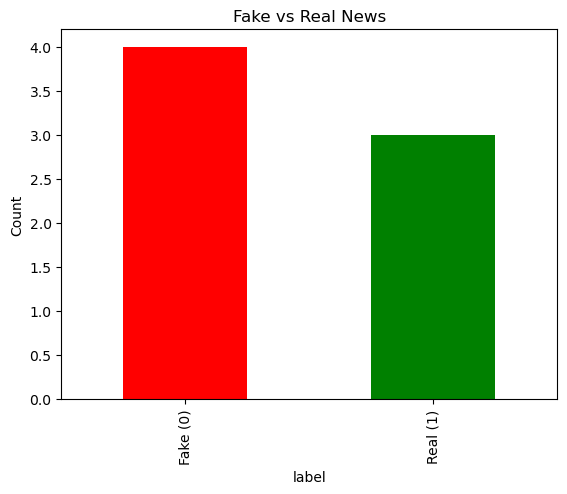

In [4]:
# 📈 Label distribution

df['label'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Fake vs Real News')
plt.xticks(ticks=[0,1], labels=['Fake (0)', 'Real (1)'])
plt.ylabel('Count')
plt.show()


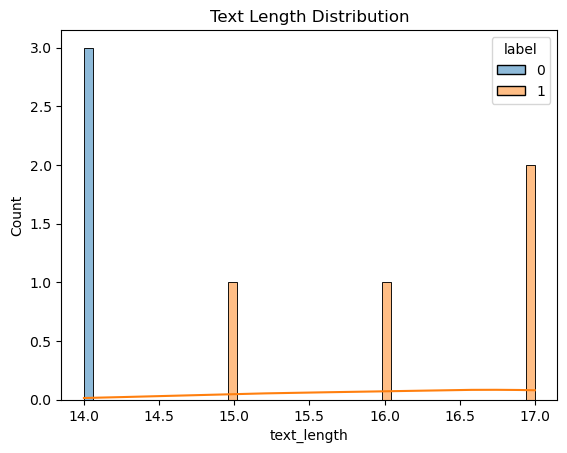

In [5]:
# 🧠 Add a 'text_length' feature

df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
df['title_length'] = df['title'].apply(lambda x: len(str(x).split()))

sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True)
plt.title('Text Length Distribution')
plt.show()


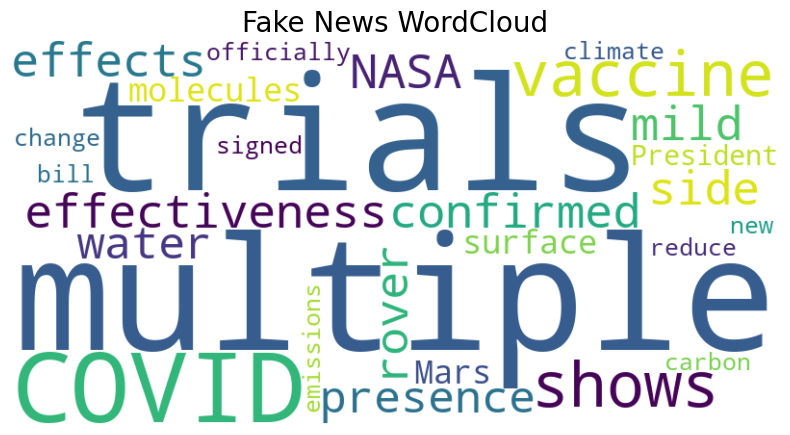

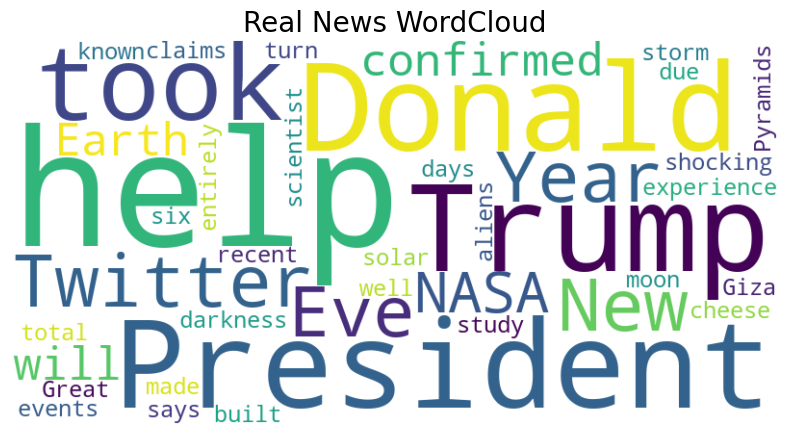

In [6]:
# ☁️ WordClouds

def show_wordcloud(data, title = None):
    text = ' '.join(data)
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
        stopwords=stopwords,
        background_color='white',
        width=800,
        height=400
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title: plt.title(title, fontsize=20)
    plt.show()

# WordClouds for Fake and Real
show_wordcloud(df[df['label'] == 0]['text'], title='Fake News WordCloud')
show_wordcloud(df[df['label'] == 1]['text'], title='Real News WordCloud')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nishi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


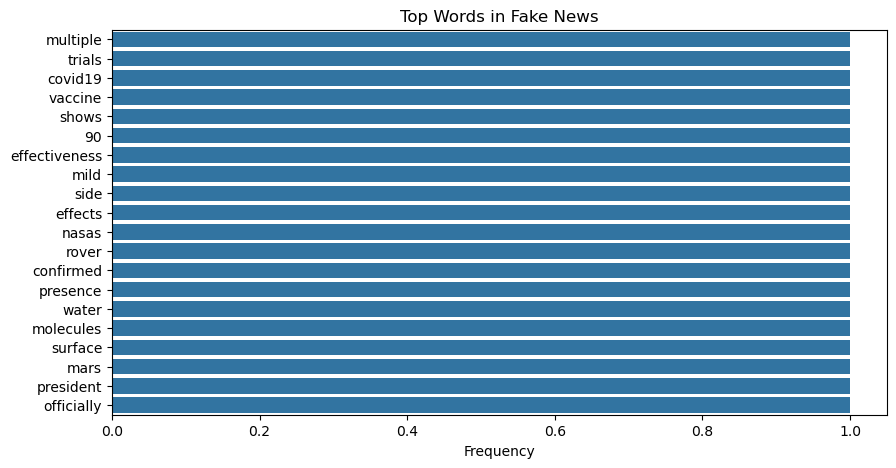

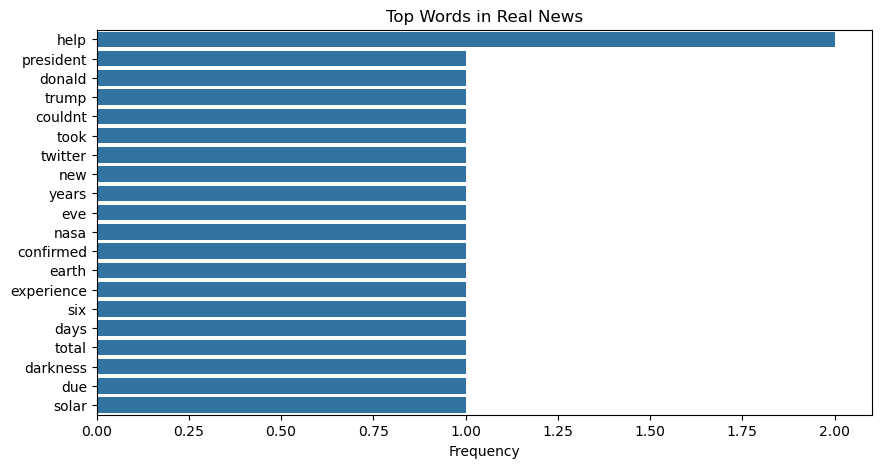

In [8]:
# 🔠 Most frequent words (bar chart)

from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def get_top_words(texts, n=20):
    all_words = ' '.join(texts).lower().translate(str.maketrans('', '', string.punctuation)).split()
    filtered_words = [word for word in all_words if word not in stop_words]
    word_counts = Counter(filtered_words)
    return word_counts.most_common(n)

# Fake news
fake_top_words = get_top_words(df[df['label'] == 0]['text'])
real_top_words = get_top_words(df[df['label'] == 1]['text'])

# Plotting
def plot_top_words(words, title):
    words, counts = zip(*words)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.xlabel('Frequency')
    plt.show()

plot_top_words(fake_top_words, 'Top Words in Fake News')
plot_top_words(real_top_words, 'Top Words in Real News')

In [9]:
# ✅ Conclusion

print("EDA Completed. Dataset is clean and ready for preprocessing and model training.")


EDA Completed. Dataset is clean and ready for preprocessing and model training.
